
# Project: Investigate a Dataset (TMDB movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movies Database (TMDb) dataset, this dataset contains information about 10,000 movies form 1960 to 2015 collected from The Movie Database (TMDb), including user ratings and revenue.  will explore data and answer this question:

*Q1 : what are the most popular genres ?

*Q2 : which movies that have high ratings? 



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**:  In this section of the report,  will load in the data, check for cleanliness, and then trim and clean  dataset for analysis.
### General Properties
• Number of samples & columns in the dataset (shape of data).

• Datatypes of the columns .

• Descriptive statistics for the dataset .

• Features with missing values .

• Duplicate rows in the dataset .

• Number of rows with missing values in the dataset .



In [2]:
df = pd.read_csv('tmdbMovies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Number of rows & columns in the dataset
* Based on the cell below, there are a totel of 10,866 number of moives and 21 columns in the dataset.

In [3]:
df.shape


(10866, 21)

* According to the cell below, will review data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

* Descriptive statistics for the dataset

In [5]:
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# running missing values in the dataset
There are missing data related to imdb_id , cast , homepage , director , tagline , keywords , overview , genres , production_companies  

we will drop useless data 

## Data cleaning

In below data cell will review missing values

In [6]:
df.isnull().any(axis=1).sum()


8874

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

* second  step change some data type

In [9]:
# converting 'Id' from float to int
df['id'] = df['id'].astype(str)
# displaying the datatypes
display(df.dtypes)

id                       object
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [10]:
df = pd.read_csv('tmdbMovies.csv', index_col="id")

* Third  step remove useless data

In [11]:
df.drop(['popularity','cast','homepage','director','tagline','keywords','overview','production_companies'],axis = 1, inplace=True)
df.head()

,imdb_id,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,
135397,tt0369610,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


* Fourth  step remove duplicated

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
print(df.duplicated().sum())

0


* Last  step Collect movies as per main category and avoid subcategory 

In [15]:
genres_df = df['genres'].str.split("|", expand=True)
genres_df.head(3)

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None


In [16]:
genres_df = genres_df.stack()

genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [17]:
genres_df.rename(columns={0:'genres_adj'}, inplace=True)


* In this step merge the result to main data

In [18]:
df_merged = df.merge(genres_df,left_index=True, right_index=True)
df_merged.head()

imdb_id     budget     revenue      original_title  runtime  \
id                                                                        
135397 0  tt0369610  150000000  1513528810      Jurassic World      124   
       1  tt0369610  150000000  1513528810      Jurassic World      124   
       2  tt0369610  150000000  1513528810      Jurassic World      124   
       3  tt0369610  150000000  1513528810      Jurassic World      124   
76341  0  tt1392190  150000000   378436354  Mad Max: Fury Road      120   

                                             genres release_date  vote_count  \
id                                                                             
135397 0  Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
       1  Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
       2  Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
       3  Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
76341  0  Action|Adventure|Science Fiction|Thriller      5/13/15        6185   

          vote_average  release_year    budget_adj   revenue_adj  \
id                                                                 
135397 0           6.5          2015  1.379999e+08  1.392446e+09   
       1           6.5          2015  1.379999e+08  1.392446e+09   
       2           6.5          2015  1.379999e+08  1.392446e+09   
       3           6.5          2015  1.379999e+08  1.392446e+09   
76341  0           7.1          2015  1.379999e+08  3.481613e+08   

               genres_adj  
id                         
135397 0           Action  
       1        Adventure  
       2  Science Fiction  
       3         Thriller  
76341  0           Action

In [19]:
df_merged.drop('genres', axis=1, inplace=True)

In [20]:
#calculate profit 
df['profit'] = df['revenue_adj'] - df['budget_adj']

display(df_merged.dtypes)

<a id='eda'></a>

## Exploratory Data Analysis
* Now data is  ready  to exploration. 

Compute statistics and visualizations to answer questions posed in the Introduction section.

From the plots  can see the relation between all values,  the relation between profit and other values to know which values have the most impact on profit.


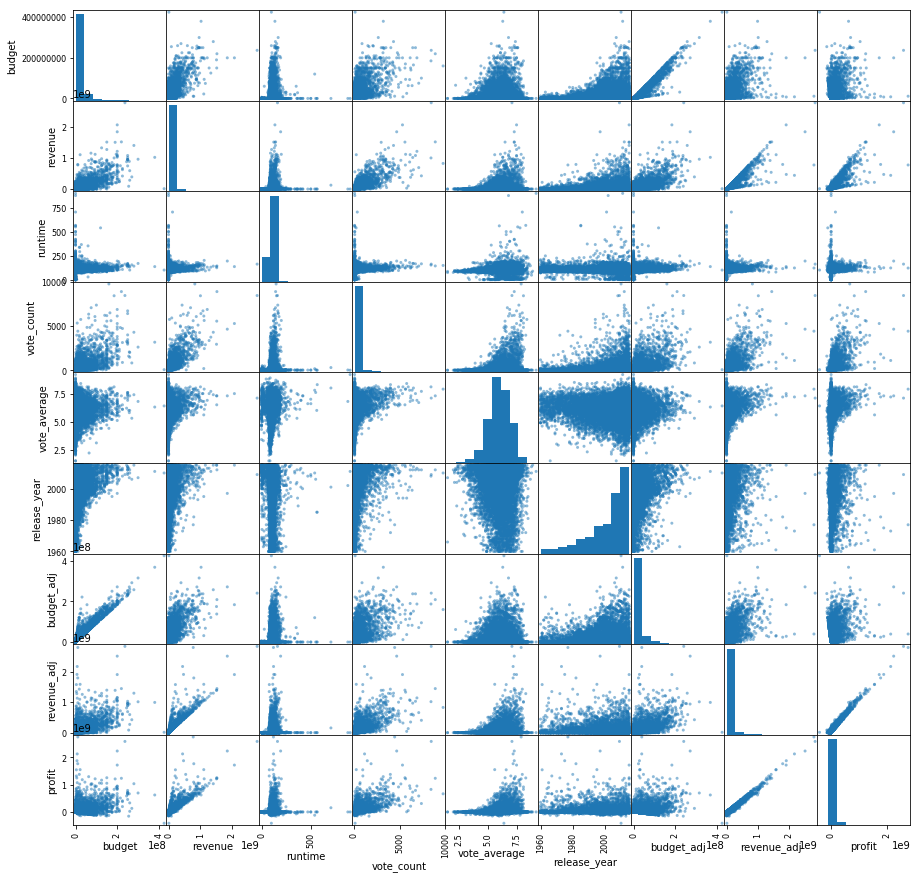

In [23]:
pd.plotting.scatter_matrix(df,figsize=(15,15));


In [21]:
df['profit'].corr(df['runtime'])

0.14232601526127384

In [22]:
df['profit'].corr(df['vote_average'])

0.19750066549487097

In [23]:
df['profit'].corr(df['budget'])

0.45359716548624612

Based on the cells above, there is a strong correlation between profit and budget,runtime. All of these correlation is positive 

### Research Question 1 (Which genres generating the highest revenues)

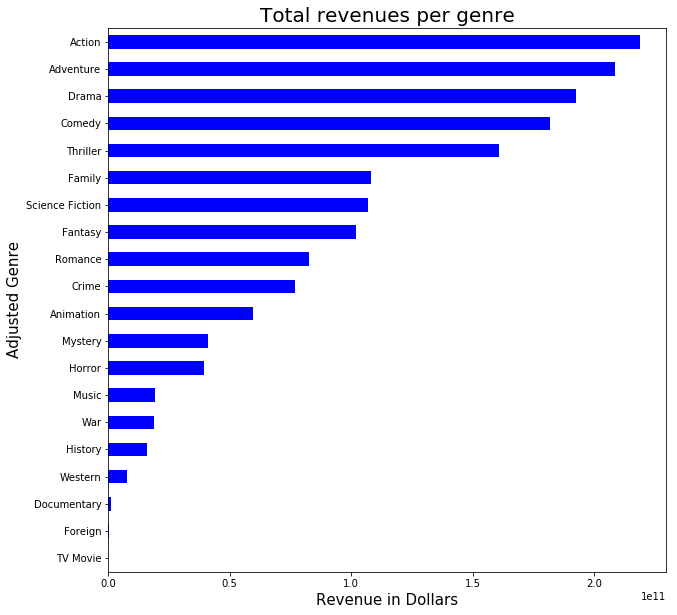

In [24]:
# Which genres generating the highest revenues
df_merged.groupby('genres_adj').revenue_adj.sum().sort_values().plot.barh(color='blue', figsize=(10,10), fontsize= 10)
plt.xlabel('Revenue in Dollars', fontsize= 15)
plt.ylabel('Adjusted Genre', fontsize= 15)
plt.title('Total revenues per genre', fontsize=20);

### Research Question 2  (Which genres generating the highest voting)

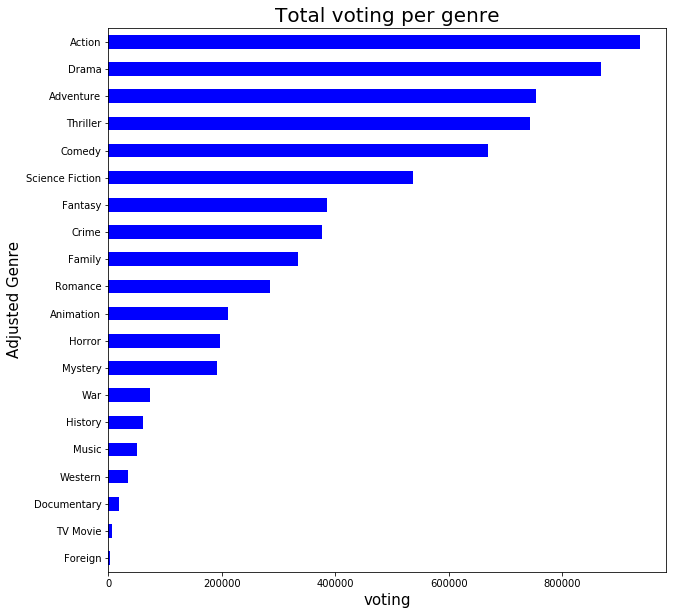

In [25]:
# Which genres generating the highest voting
df_merged.groupby('genres_adj').vote_count.sum().sort_values().plot.barh(color='blue', figsize=(10,10), fontsize= 10)
plt.xlabel('voting', fontsize= 15)
plt.ylabel('Adjusted Genre', fontsize= 15)
plt.title('Total voting per genre', fontsize=20);

<a id='conclusions'></a>
## Conclusions


* Based on previous analyzes the top one is action this means that the cinema industry in this type of films will achieve profits in addition to the fact that obtaining the highest rating will also give it a greater chance of obtaining prizes.

* top 5 as per voting : Action , Drama , Adventure , Thriller , Comedy

* top 5 as per revenue : Action , Adventure , Drama , Comedy , Thriller 


* The other top movies type Drama & Adventure & Thriller & Comedy ,They are not in the same order in revenue  and voting , but they are in the top five on the revenue side and the voting side

* Relation between the budget and the revenue : positive relationship
* Relation between the budget and the runtime: No effect of the long runtime on increasing the budget


##Limitations:
* We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. as there are missing data
* Dropping missing or Null values from variables of  might  effect in  analysis accurecy  and could show unintentional bias towards the relationship being analyzed. 


In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0